In [1]:
! pip install pandas seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
file_path = "~/workspace/ME_592_Assignment1/energydata_complete.csv"
df = pd.read_csv(file_path, parse_dates=["date"], index_col="date")

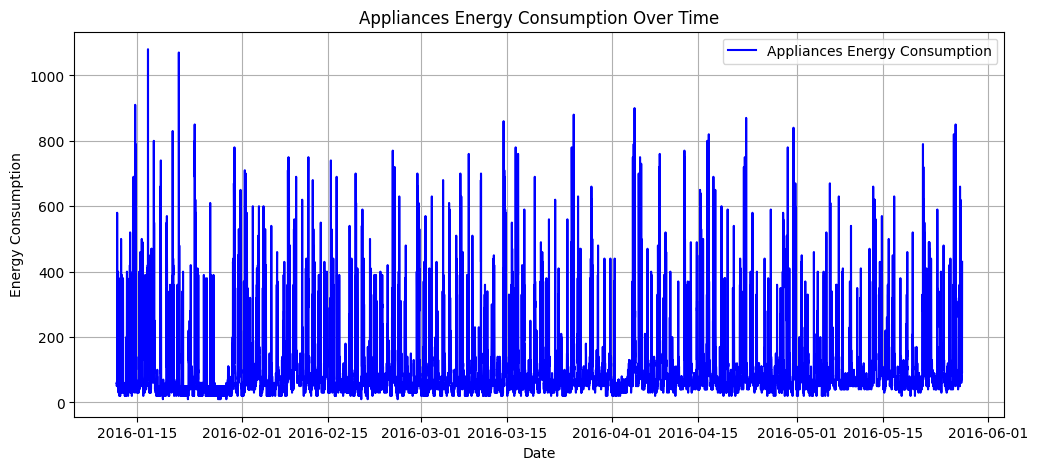

In [4]:
# Plot energy consumption for the entire period
plt.figure(figsize=(12, 5))
plt.plot(df.index, df["Appliances"], label="Appliances Energy Consumption", color="blue")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Appliances Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.show()

(1152, 28)


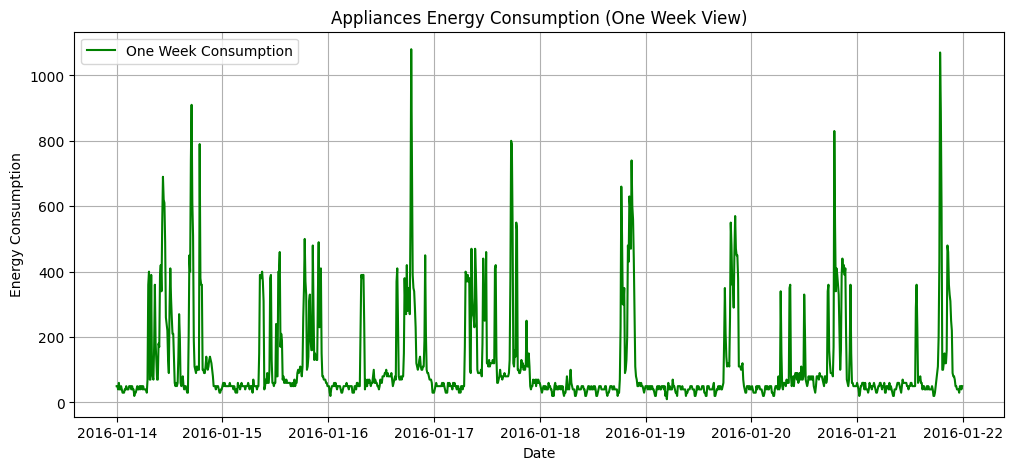

In [5]:
import seaborn as sns
# Select one week's data
one_week_data = df.loc["2016-01-14":"2016-01-21"]
print(one_week_data.shape)
# Plot energy consumption for one week
plt.figure(figsize=(12, 5))
plt.plot(one_week_data.index, one_week_data["Appliances"], label="One Week Consumption", color="green")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.title("Appliances Energy Consumption (One Week View)")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# Select one week's data (January 17-13, 2016)
start_date = "2016-01-17"
end_date = "2016-01-23"
df_week = df.loc[start_date:end_date].copy()
# df_week['date'] = pd.to_datetime(df_week['date'])

In [7]:
# Reshape data for heatmap: Hourly consumption for each day of the week
df_week['hour'] = df_week.index.hour
df_week['day'] = df_week.index.date
df_week['day_name'] = pd.to_datetime(df_week['day']).dt.day_name()


In [8]:
pd.to_datetime(df_week['day']).dt.day_name().head()

date
2016-01-17 00:00:00    Sunday
2016-01-17 00:10:00    Sunday
2016-01-17 00:20:00    Sunday
2016-01-17 00:30:00    Sunday
2016-01-17 00:40:00    Sunday
Name: day, dtype: object

In [9]:
df_week[142:150]

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,hour,day,day_name
date,,,,,,,,,,,,,,,,,,,,,
2016-01-17 23:40:00,70,20,21.926667,39.900000,20.390000,39.863333,20.390000,39.76,21.133333,39.790000,...,763.833333,85.0,2.0,26.333333,-4.900000,11.288092,11.288092,23,2016-01-17,Sunday
2016-01-17 23:50:00,60,10,21.890000,39.900000,20.290000,40.000000,20.390000,39.79,21.100000,39.790000,...,763.766667,85.5,2.0,25.666667,-4.900000,3.098518,3.098518,23,2016-01-17,Sunday
2016-01-18 00:00:00,60,10,21.823333,39.900000,20.230000,40.000000,20.323333,39.79,21.166667,39.863333,...,763.700000,86.0,2.0,25.000000,-4.900000,2.995012,2.995012,0,2016-01-18,Monday
2016-01-18 00:10:00,50,10,21.790000,39.933333,20.166667,40.090000,20.390000,39.79,21.100000,39.826667,...,763.583333,86.0,2.0,25.500000,-4.983333,7.407794,7.407794,0,2016-01-18,Monday
2016-01-18 00:20:00,40,10,21.730000,40.000000,20.075000,40.067500,20.323333,39.79,21.100000,39.900000,...,763.466667,86.0,2.0,26.000000,-5.066667,3.649394,3.649394,0,2016-01-18,Monday
2016-01-18 00:30:00,30,20,21.666667,40.000000,20.000000,40.000000,20.290000,39.70,21.100000,39.933333,...,763.350000,86.0,2.0,26.500000,-5.150000,2.144295,2.144295,0,2016-01-18,Monday
2016-01-18 00:40:00,40,0,21.600000,40.193333,19.945000,40.000000,20.260000,39.76,21.100000,40.000000,...,763.233333,86.0,2.0,27.000000,-5.233333,26.123064,26.123064,0,2016-01-18,Monday
2016-01-18 00:50:00,50,0,21.566667,40.500000,19.890000,40.030000,20.200000,39.70,21.066667,40.026667,...,763.116667,86.0,2.0,27.500000,-5.316667,39.461574,39.461574,0,2016-01-18,Monday


In [10]:
days_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df_week['day_name'] = pd.Categorical(df_week['day_name'], categories=days_order, ordered=True)
pivot_table = df_week.pivot_table(values='Appliances', index='hour', columns='day_name', aggfunc='mean', observed=False)

In [16]:
pivot_table = pivot_table.iloc[::-1]

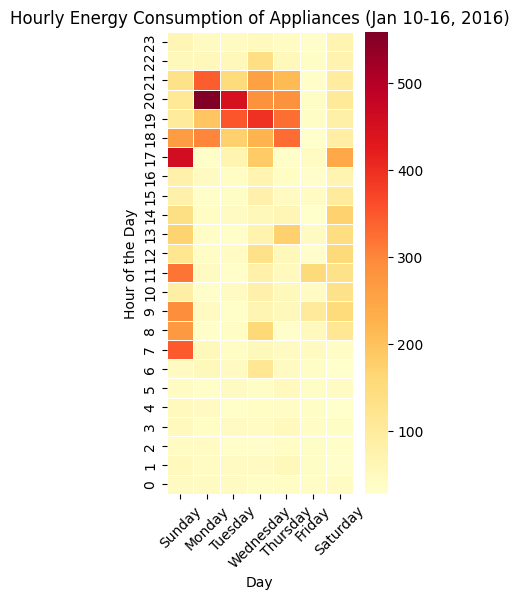

In [17]:
plt.figure(figsize=(3, 6))
sns.heatmap(pivot_table, cmap="YlOrRd", annot=False, fmt=".1f", linewidth=0.5)
plt.title("Hourly Energy Consumption of Appliances (Jan 10-16, 2016)")
plt.xlabel("Day")
plt.ylabel("Hour of the Day")
plt.xticks(rotation=45)
plt.show()

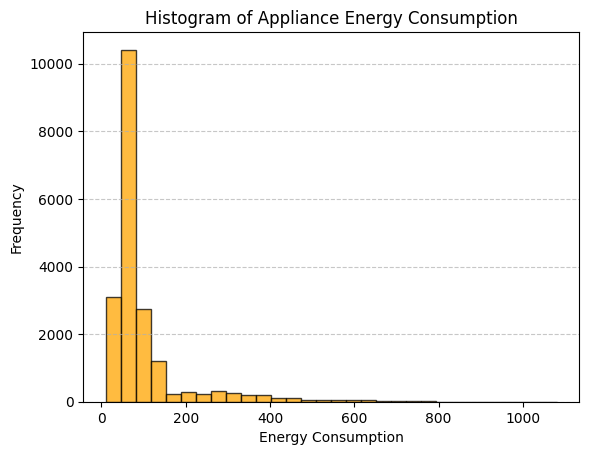

In [19]:
plt.hist(df['Appliances'], bins=30, color="orange", edgecolor="black", alpha=0.75)

# Labels and title
plt.xlabel("Energy Consumption")
plt.ylabel("Frequency")
plt.title("Histogram of Appliance Energy Consumption")

# Show the grid for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [20]:
# Calculate NSM (Number of Seconds from Midnight)
df['date'] = pd.to_datetime(df['date'])
df['NSM'] =  pdf['date'].dt.hour * 3600 + df['date'].dt.minute * 60 + df['date'].dt.second

KeyError: 'date'

In [23]:
df.index = pd.to_datetime(df.index)

In [25]:
df['NSM'] = df.index.hour * 3600 + df.index.minute * 60 + df.index.second

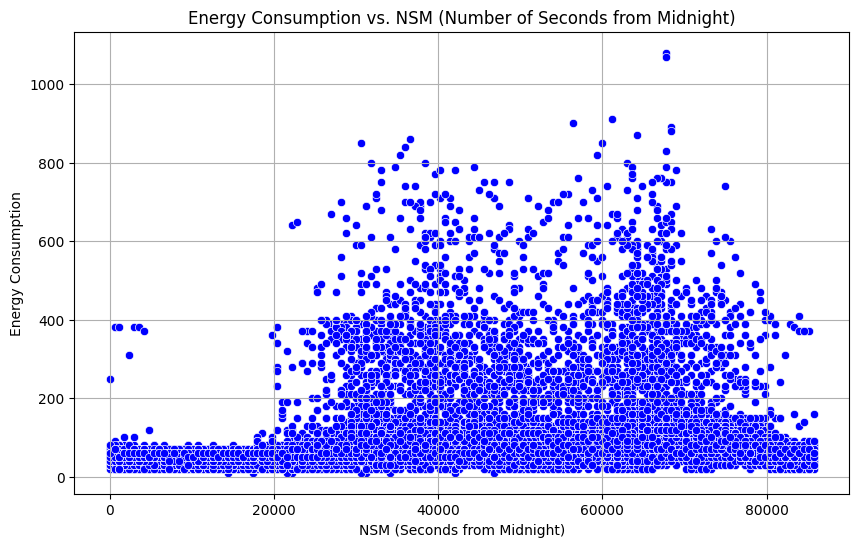

In [29]:
# Plot energy consumption vs. NSM
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NSM', y='Appliances', data=df, color='blue')
# sns.regplot(x='NSM', y='Appliances', data=df, scatter=True, color='blue', line_kws={'color': 'red'})
plt.title('Energy Consumption vs. NSM (Number of Seconds from Midnight)')
plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption')
plt.grid(True)
plt.show()

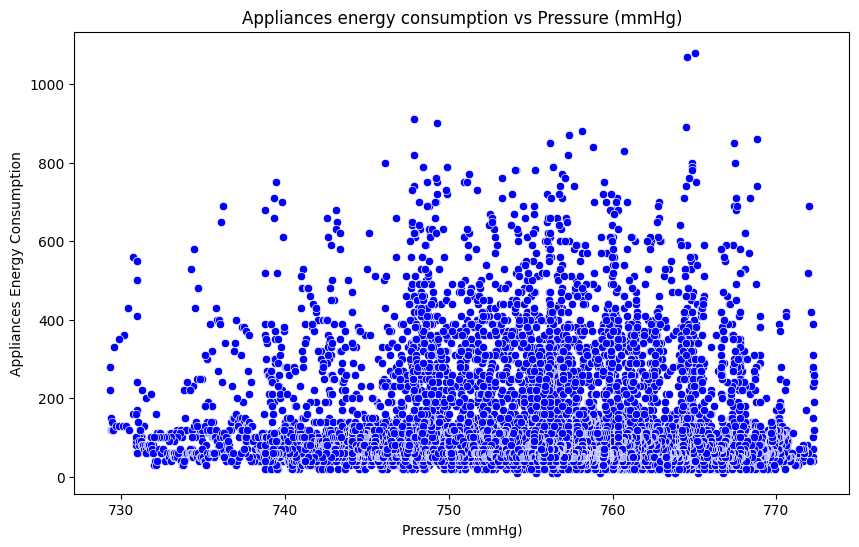

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Press_mm_hg', y='Appliances', data=df, color='blue')
plt.title('Appliances energy consumption vs Pressure (mmHg)')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Appliances Energy Consumption')
plt.show()